In [7]:
import cv2
from skimage.io import imread_collection
import os
import numpy as np
import matplotlib.pyplot as plt

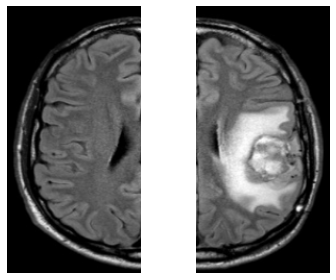

In [9]:
def splitImage(imagePath="images/fig1.jpg",blocksH=2,blocksW=2,w=256,h=256):
    im =  cv2.imread(imagePath)
    im = cv2.resize(im,(w,h))

    imgheight=im.shape[0]
    imgwidth=im.shape[1]

    M = imgheight//blocksH
    N = imgwidth//blocksW
    images=[]
    for y in range(0,imgheight,M):
        for x in range(0, imgwidth, N):
            images.append(im[y:y+M,x:x+N])

    return images

path_imgNo="C:/Users/pasus/Bureau/M2/IM/TP3_IM/brain_tumor_dataset/no/5 no.jpg"
path_imgYes="C:/Users/pasus/Bureau/M2/IM/TP3_IM/brain_tumor_dataset/yes/Y20.jpg"

blocksH=1
blocksW=2
l_images= splitImage(imagePath=path_imgYes,blocksH=blocksH,blocksW=blocksW)
fig = plt.figure()

for i in range(blocksH*blocksW):
    ax = fig.add_subplot(blocksH, blocksW, i+1);
    plt.imshow(l_images[i]);
    ax.set_axis_off();

plt.tight_layout()
plt.show()

In [11]:
#####################################################################
def SURF(img):
    surf = cv2.xfeatures2d.SURF_create()
    keypoints_surf, descriptors = surf.detectAndCompute(img, None)
    #keypoints_surf, descriptors = surf.detectAndCompute(img, None)
    print("Features : ",len(keypoints_surf))
    imgKP = cv2.drawKeypoints(img, keypoints_surf, None)
    return imgKP

#####################################################################
def SIFT(img,Filter=False):
    if Filter: img = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
    sift = cv2.SIFT_create()
    keypoints_sift, descriptors = sift.detectAndCompute(img, None)
    #print("Features : ",len(keypoints_sift))
    imgKP = cv2.drawKeypoints(img, keypoints_sift, None)
    return imgKP,len(keypoints_sift)
#####################################################################
def ORB(img,Filter=False):
    if Filter : img = cv2.detailEnhance(img,  sigma_s=10, sigma_r=0.15)
    orb = cv2.ORB_create(nfeatures=1500)
    keypoints_orb, descriptors = orb.detectAndCompute(img, None)
    #print("Features : ",len(keypoints_orb))


    imgKP = cv2.drawKeypoints(img, keypoints_orb, None)
    return imgKP,len(keypoints_orb)
########################################################
def load_images_from_folder(folder,width=256, height=256):
    images = []
    names=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        dim = (width, height)
        # resize image
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

        if img is not None:
            images.append(img)
            names.append(filename)
    return images,names
##########################################################""
#your path

#normal_dir = 'images/covid19-mini-dataset/normal/'
#abnormal_dir = 'images/covid19-mini-dataset/covid/'

normal_dir = "C:/Users/pasus/Bureau/M2/IM/TP3_IM/brain_tumor_dataset/no"
abnormal_dir = "C:/Users/pasus/Bureau/M2/IM/TP3_IM/brain_tumor_dataset/yes"

#creating a collection with the available images
#col = imread_collection(normal_dir)

In [12]:
def splitImage2(imagePath,blocksH=2,blocksW=2,w=256,h=256):
    im =  np.array(imagePath)
    im = cv2.resize(im,(w,h))

    imgheight=im.shape[0]
    imgwidth=im.shape[1]

    M = imgheight//blocksH
    N = imgwidth//blocksW
    images=[]
    for y in range(0,imgheight,M):
        for x in range(0, imgwidth, N):
            images.append(im[y:y+M,x:x+N])

    return images

In [13]:
col_normal,files_normal = load_images_from_folder(normal_dir)
print("Normal ")
for img,filename in zip(col_normal,files_normal) :
    spl_images= splitImage2(imagePath=img,blocksH=blocksH,blocksW=blocksW)
    FimgF,nbr_features = SIFT(spl_images[0],Filter=True)
    FimgF2,nbr_features2 = SIFT(spl_images[1],Filter=True)

    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)

    print("gauche "+filename+" , "+str(nbr_features)+" | "+ " droit "+filename+" , "+str(nbr_features2))


Normal 
gauche 1 no.jpeg , 115 |  droit 1 no.jpeg , 118
gauche 10 no.jpg , 199 |  droit 10 no.jpg , 191
gauche 11 no.jpg , 64 |  droit 11 no.jpg , 76
gauche 12 no.jpg , 127 |  droit 12 no.jpg , 137
gauche 13 no.jpg , 74 |  droit 13 no.jpg , 92
gauche 14 no.jpg , 192 |  droit 14 no.jpg , 175
gauche 15 no.jpg , 214 |  droit 15 no.jpg , 196
gauche 17 no.jpg , 163 |  droit 17 no.jpg , 151
gauche 18 no.jpg , 171 |  droit 18 no.jpg , 148
gauche 19 no.jpg , 150 |  droit 19 no.jpg , 142
gauche 2 no.jpeg , 81 |  droit 2 no.jpeg , 85
gauche 20 no.jpg , 190 |  droit 20 no.jpg , 192
gauche 21 no.jpg , 151 |  droit 21 no.jpg , 149
gauche 22 no.jpg , 240 |  droit 22 no.jpg , 284
gauche 23 no.jpg , 335 |  droit 23 no.jpg , 309
gauche 24 no.jpg , 225 |  droit 24 no.jpg , 188
gauche 25 no.jpg , 239 |  droit 25 no.jpg , 178
gauche 26 no.jpg , 221 |  droit 26 no.jpg , 248
gauche 27 no.jpg , 163 |  droit 27 no.jpg , 151
gauche 28 no.jpg , 162 |  droit 28 no.jpg , 158
gauche 29 no.jpg , 128 |  droit 29 no.

In [14]:
col_abnormal,files_abnormal = load_images_from_folder(abnormal_dir)
print("AbNormal ")
#for img in col_abnormal :
for img, filename in zip(col_abnormal, files_abnormal):
    FimgF,nbr_features = SIFT(spl_images[0],Filter=True)
    FimgF2,nbr_features2 = SIFT(spl_images[1],Filter=True)

    cv2.imwrite("images/features/ABN-"+str(nbr_features)+"-"+filename,FimgF)
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    
    print("gauche "+filename+" , "+str(nbr_features)+" | "+ " droit "+filename+" , "+str(nbr_features2))


AbNormal 
gauche Y1.jpg , 184 |  droit Y1.jpg , 188
gauche Y10.jpg , 184 |  droit Y10.jpg , 188
gauche Y100.JPG , 184 |  droit Y100.JPG , 188
gauche Y101.jpg , 184 |  droit Y101.jpg , 188
gauche Y102.jpg , 184 |  droit Y102.jpg , 188
gauche Y103.jpg , 184 |  droit Y103.jpg , 188
gauche Y104.jpg , 184 |  droit Y104.jpg , 188
gauche Y105.jpg , 184 |  droit Y105.jpg , 188
gauche Y106.jpg , 184 |  droit Y106.jpg , 188
gauche Y107.jpg , 184 |  droit Y107.jpg , 188
gauche Y108.jpg , 184 |  droit Y108.jpg , 188
gauche Y109.JPG , 184 |  droit Y109.JPG , 188
gauche Y11.jpg , 184 |  droit Y11.jpg , 188
gauche Y111.JPG , 184 |  droit Y111.JPG , 188
gauche Y112.JPG , 184 |  droit Y112.JPG , 188
gauche Y113.JPG , 184 |  droit Y113.JPG , 188
gauche Y114.JPG , 184 |  droit Y114.JPG , 188
gauche Y115.JPG , 184 |  droit Y115.JPG , 188
gauche Y116.JPG , 184 |  droit Y116.JPG , 188
gauche Y117.JPG , 184 |  droit Y117.JPG , 188
gauche Y12.jpg , 184 |  droit Y12.jpg , 188
gauche Y120.JPG , 184 |  droit Y12

In [20]:
col_normal,files_normal = load_images_from_folder(normal_dir)
print("Normal ")
for img,filename in zip(col_normal,files_normal) :
    spl_images= splitImage2(imagePath=img,blocksH=2,blocksW=2)
    FimgF,nbr_features = SIFT(spl_images[0],Filter=True)
    FimgF2,nbr_features2 = SIFT(spl_images[1],Filter=True)
    FimgF3,nbr_features3 = SIFT(spl_images[2],Filter=True)
    FimgF4,nbr_features4 = SIFT(spl_images[3],Filter=True)

    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    cv2.imwrite("images/features/NOR-"+str(nbr_features3)+"-"+filename,FimgF3)
    cv2.imwrite("images/features/NOR-"+str(nbr_features4)+"-"+filename,FimgF4)

    print("gauche_H "+filename+" , "+str(nbr_features)+" | "+ " droit_H "+filename+" , "+str(nbr_features2)
         +" | "+ " gauche_B "+filename+" , "+str(nbr_features3)+" | "+ " droit_B "+filename+" , "+str(nbr_features4))


Normal 
gauche_H 1 no.jpeg , 62 |  droit_H 1 no.jpeg , 58 |  gauche_B 1 no.jpeg , 47 |  droit_B 1 no.jpeg , 55
gauche_H 10 no.jpg , 99 |  droit_H 10 no.jpg , 73 |  gauche_B 10 no.jpg , 91 |  droit_B 10 no.jpg , 103
gauche_H 11 no.jpg , 29 |  droit_H 11 no.jpg , 42 |  gauche_B 11 no.jpg , 32 |  droit_B 11 no.jpg , 30
gauche_H 12 no.jpg , 49 |  droit_H 12 no.jpg , 53 |  gauche_B 12 no.jpg , 73 |  droit_B 12 no.jpg , 79
gauche_H 13 no.jpg , 35 |  droit_H 13 no.jpg , 38 |  gauche_B 13 no.jpg , 35 |  droit_B 13 no.jpg , 49
gauche_H 14 no.jpg , 96 |  droit_H 14 no.jpg , 67 |  gauche_B 14 no.jpg , 84 |  droit_B 14 no.jpg , 92
gauche_H 15 no.jpg , 100 |  droit_H 15 no.jpg , 86 |  gauche_B 15 no.jpg , 102 |  droit_B 15 no.jpg , 101
gauche_H 17 no.jpg , 60 |  droit_H 17 no.jpg , 64 |  gauche_B 17 no.jpg , 92 |  droit_B 17 no.jpg , 81
gauche_H 18 no.jpg , 63 |  droit_H 18 no.jpg , 76 |  gauche_B 18 no.jpg , 101 |  droit_B 18 no.jpg , 71
gauche_H 19 no.jpg , 65 |  droit_H 19 no.jpg , 79 |  gauche_

gauche_H No13.jpg , 59 |  droit_H No13.jpg , 58 |  gauche_B No13.jpg , 65 |  droit_B No13.jpg , 64
gauche_H No14.jpg , 92 |  droit_H No14.jpg , 49 |  gauche_B No14.jpg , 89 |  droit_B No14.jpg , 58
gauche_H No15.jpg , 81 |  droit_H No15.jpg , 69 |  gauche_B No15.jpg , 78 |  droit_B No15.jpg , 76
gauche_H No16.jpg , 62 |  droit_H No16.jpg , 51 |  gauche_B No16.jpg , 67 |  droit_B No16.jpg , 72
gauche_H No17.jpg , 81 |  droit_H No17.jpg , 69 |  gauche_B No17.jpg , 78 |  droit_B No17.jpg , 76
gauche_H No18.jpg , 66 |  droit_H No18.jpg , 73 |  gauche_B No18.jpg , 64 |  droit_B No18.jpg , 65
gauche_H No19.jpg , 39 |  droit_H No19.jpg , 62 |  gauche_B No19.jpg , 33 |  droit_B No19.jpg , 30
gauche_H No20.jpg , 52 |  droit_H No20.jpg , 35 |  gauche_B No20.jpg , 36 |  droit_B No20.jpg , 30
gauche_H No21.jpg , 60 |  droit_H No21.jpg , 73 |  gauche_B No21.jpg , 81 |  droit_B No21.jpg , 77
gauche_H No22.jpg , 95 |  droit_H No22.jpg , 104 |  gauche_B No22.jpg , 80 |  droit_B No22.jpg , 72


In [21]:
moy_region1 = np.mean(nbr_features)
moy_region2 = np.mean(nbr_features2)
moy_region3 = np.mean(nbr_features3)
moy_region4 = np.mean(nbr_features4)

In [22]:
sig_region1 = np.std(nbr_features)
sig_region2 = np.std(nbr_features2)
sig_region3 = np.std(nbr_features3)
sig_region4 = np.std(nbr_features4)

In [23]:
col_abnormal,files_abnormal = load_images_from_folder(abnormal_dir)
print("AbNormal ")
#for img in col_abnormal :
for img, filename in zip(col_abnormal, files_abnormal):
    spl_images= splitImage2(imagePath=img,blocksH=2,blocksW=2)
    FimgF,nbr_features_   = SIFT(spl_images[0],Filter=True)
    FimgF2,nbr_features2_ = SIFT(spl_images[1],Filter=True)
    FimgF3,nbr_features3_ = SIFT(spl_images[2],Filter=True)
    FimgF4,nbr_features4_ = SIFT(spl_images[3],Filter=True)

    cv2.imwrite("images/features/ABN-"+str(nbr_features_)+"-"+filename,FimgF)
    cv2.imwrite("images/features/ABN-"+str(nbr_features2_)+"-"+filename,FimgF2)
    cv2.imwrite("images/features/ABN-"+str(nbr_features3_)+"-"+filename,FimgF3)
    cv2.imwrite("images/features/ABN-"+str(nbr_features4_)+"-"+filename,FimgF4)

    print("gauche_H "+filename+" , "+str(nbr_features_)+" | "+ " droit_H "+filename+" , "+str(nbr_features2_)
         +" | "+ " gauche_B "+filename+" , "+str(nbr_features3_)+" | "+ " droit_B "+filename+" , "+str(nbr_features4_))


AbNormal 
gauche_H Y1.jpg , 92 |  droit_H Y1.jpg , 102 |  gauche_B Y1.jpg , 84 |  droit_B Y1.jpg , 72
gauche_H Y10.jpg , 68 |  droit_H Y10.jpg , 95 |  gauche_B Y10.jpg , 71 |  droit_B Y10.jpg , 88
gauche_H Y100.JPG , 61 |  droit_H Y100.JPG , 46 |  gauche_B Y100.JPG , 73 |  droit_B Y100.JPG , 86
gauche_H Y101.jpg , 58 |  droit_H Y101.jpg , 43 |  gauche_B Y101.jpg , 26 |  droit_B Y101.jpg , 28
gauche_H Y102.jpg , 78 |  droit_H Y102.jpg , 79 |  gauche_B Y102.jpg , 70 |  droit_B Y102.jpg , 105
gauche_H Y103.jpg , 75 |  droit_H Y103.jpg , 61 |  gauche_B Y103.jpg , 74 |  droit_B Y103.jpg , 35
gauche_H Y104.jpg , 42 |  droit_H Y104.jpg , 79 |  gauche_B Y104.jpg , 120 |  droit_B Y104.jpg , 107
gauche_H Y105.jpg , 79 |  droit_H Y105.jpg , 41 |  gauche_B Y105.jpg , 105 |  droit_B Y105.jpg , 95
gauche_H Y106.jpg , 119 |  droit_H Y106.jpg , 116 |  gauche_B Y106.jpg , 61 |  droit_B Y106.jpg , 44
gauche_H Y107.jpg , 65 |  droit_H Y107.jpg , 35 |  gauche_B Y107.jpg , 93 |  droit_B Y107.jpg , 43
gauch

gauche_H Y258.JPG , 97 |  droit_H Y258.JPG , 137 |  gauche_B Y258.JPG , 56 |  droit_B Y258.JPG , 83
gauche_H Y259.JPG , 76 |  droit_H Y259.JPG , 117 |  gauche_B Y259.JPG , 83 |  droit_B Y259.JPG , 65
gauche_H Y26.jpg , 89 |  droit_H Y26.jpg , 65 |  gauche_B Y26.jpg , 36 |  droit_B Y26.jpg , 38
gauche_H Y27.jpg , 48 |  droit_H Y27.jpg , 18 |  gauche_B Y27.jpg , 19 |  droit_B Y27.jpg , 13
gauche_H Y28.jpg , 80 |  droit_H Y28.jpg , 76 |  gauche_B Y28.jpg , 73 |  droit_B Y28.jpg , 81
gauche_H Y29.jpg , 43 |  droit_H Y29.jpg , 54 |  gauche_B Y29.jpg , 29 |  droit_B Y29.jpg , 52
gauche_H Y3.jpg , 94 |  droit_H Y3.jpg , 98 |  gauche_B Y3.jpg , 81 |  droit_B Y3.jpg , 104
gauche_H Y30.jpg , 80 |  droit_H Y30.jpg , 80 |  gauche_B Y30.jpg , 57 |  droit_B Y30.jpg , 50
gauche_H Y31.jpg , 16 |  droit_H Y31.jpg , 27 |  gauche_B Y31.jpg , 21 |  droit_B Y31.jpg , 20
gauche_H Y32.jpg , 66 |  droit_H Y32.jpg , 58 |  gauche_B Y32.jpg , 72 |  droit_B Y32.jpg , 71
gauche_H Y33.jpg , 65 |  droit_H Y33.jpg , 

In [24]:
moy_region1_ = np.mean(nbr_features_)
moy_region2_ = np.mean(nbr_features2_)
moy_region3_ = np.mean(nbr_features3_)
moy_region4_ = np.mean(nbr_features4_)

In [25]:
sig_region1_ = np.std(nbr_features_)
sig_region2_ = np.std(nbr_features2_)
sig_region3_ = np.std(nbr_features3_)
sig_region4_ = np.std(nbr_features4_)